# Importowanie potrzebnych bibliotek

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Wczytanie danych z arkusza

In [3]:
df = pd.read_excel('bazy_danych_zebranych_z_literatury.xlsx')

In [3]:
df

,NUM,compound_name,abbreviation,DTXSID,PubChem Identifier,molecular formula,supplier,SMILES (canonical),CAS,Molecular Weight,...,Covalently-Bonded Unit Count,Melting point (°C),Flash point (°C),Boiling point(°C),Vapor pressure at 25°C Log10(mmHg),Density (g/cm³),Water Solubility Pred_Value (mg/L),Checked Development Neurotoxicity,Predicted Development Neurotoxicity,inne
0,1,(-)-Nicotine,NC,DTXSID1020930,89594.0,C10H14N2,Sigma-Aldrich,CN1CCCC1C2=CN=CC=C2,54-11-5,162.23,...,1,-80.0,111.00,247.00,-1.66,1.02,12972.02000,NaN,Developmental toxicant,no hit
1,2,(+-)-Ketamine hydrochloride,KETA,DTXSID4040137,15851.0,C13H17Cl2NO,Sigma-Aldrich,CNC1(CCCCC1=O)C2=CC=CC=C2Cl.Cl,1867-66-9,274.18,...,2,265.0,173.80,NaN,NaN,NaN,NaN,NaN,?,no hit
2,3,1-Methyl-4-phenylpyridinium iodide,MPP,DTXSID40880040,10924457.0,C12H12IN,Sigma-Aldrich,C[N+]1=CC=C(C=C1)C2=CC=CC=C2.[I-],36913-39-0,297.13,...,2,167.0,111.10,NaN,NaN,NaN,NaN,NaN,?,specific hit
3,4,1-Naphthol,NT,DTXSID6021793,7005.0,C10H8O,Sigma-Aldrich,C1=CC=C2C(=C1)C=CC=C2O,90-15-3,144.17,...,1,96.0,144.00,288.00,-2.64,1.19,444.50000,NaN,Developmental toxicant,specific hit
4,5,"2,2',4,4'-Tetrabromodiphenyl ether",BDE-47,DTXSID3030056,95170.0,C12H6Br4O,NTP,C1=CC(=C(C=C1Br)Br)OC2=C(C=C(C=C2)Br)Br,5436-43-1,485.79,...,1,82.0,NaN,396.00,-6.80,2.37,0.00272,NaN,?,specific hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,115,Tris(2-butoxyethyl)phosphate,TBOEP,DTXSID5021758,6540.0,C18H39O7P,Sigma-Aldrich,CCCCOCCOP(=O)(OCCOCCCC)OCCOCCCC,78-51-3,398.50,...,1,-70.0,241.50,353.92,-5.42,1.03,236.46000,NaN,Developmental toxicant,specific hit
115,116,Tris(2-Chloroisopropyl)phosphate,TCPP,DTXSID5026259,26176.0,C9H18Cl3O4P,ToxCast,CC(CCl)OP(=O)(OC(C)CCl)OC(C)CCl,13674-84-5,327.60,...,1,-40.0,177.78,270.00,-3.53,1.28,343.14000,NaN,Developmental toxicant,no hit
116,117,Tris(chloroethyl)phosphate,TCEP,DTXSID5021411,8295.0,C6H12Cl3O4P,Sigma-Aldrich,C(CCl)OP(=O)(OCCCl)OCCCl,115-96-8,285.50,...,1,-35.0,232.20,330.00,-3.19,1.39,1446.02000,NaN,Developmental NON-toxicant,no hit
117,118,Tris(methylphenyl) phosphate,TTP,DTXSID4021391,6529.0,C21H21O4P,ToxCast,CC1=CC=C(C=C1)OP(=O)(OC2=CC=C(C=C2)C)OC3=CC=C(...,1330-78-5,368.40,...,1,77.0,NaN,NaN,NaN,NaN,NaN,NaN,?,specific hit


# Usunięcie niepotrzebnych kolumn

In [4]:
df = df.drop(["NUM",'Checked Development Neurotoxicity', 'Vapor pressure at 25°C Log10(mmHg)','Flash point (°C)',"Water Solubility Pred_Value (mg/L)",'Boiling point(°C)' ], axis = 1)

In [5]:
# Usunięcie wierszy zawierających jakiekolwiek puste wartości
df = df.dropna()

# Sprawdzenie, czy wszystkie brakujące wartości zostały usunięte
print(df.isnull().sum())


compound_name                          0
abbreviation                           0
DTXSID                                 0
PubChem Identifier                     0
molecular formula                      0
supplier                               0
SMILES (canonical)                     0
CAS                                    0
Molecular Weight                       0
ConformerCount3D                       0
EffectiveRotorCount3D                  0
ConformerModelRMSD3D                   0
ZStericQuadrupole3D                    0
YStericQuadrupole3D                    0
XStericQuadrupole3D                    0
Volume3D                               0
XLogP3                                 0
Hydrogen Bond Donor Count              0
Hydrogen Bond Acceptor Count           0
Exact Mass                             0
Topological Polar Surface Area(Å²)     0
Heavy Atom Count                       0
Complexity                             0
AtomStereoCount                        0
Defined Atom Ste

In [6]:
df = df.reset_index(drop=True) #ponowna indeksacja wierszy
df

,compound_name,abbreviation,DTXSID,PubChem Identifier,molecular formula,supplier,SMILES (canonical),CAS,Molecular Weight,ConformerCount3D,...,AtomStereoCount,Defined Atom Stereocenter Count,Undefined Atom Stereocenter Count,Defined Bond Stereocenter Count,Undefined Bond Stereocenter Count,Covalently-Bonded Unit Count,Melting point (°C),Density (g/cm³),Predicted Development Neurotoxicity,inne
0,(-)-Nicotine,NC,DTXSID1020930,89594.0,C10H14N2,Sigma-Aldrich,CN1CCCC1C2=CN=CC=C2,54-11-5,162.23,8.0,...,1.0,1,0,0,0,1,-80.0,1.0200,Developmental toxicant,no hit
1,1-Naphthol,NT,DTXSID6021793,7005.0,C10H8O,Sigma-Aldrich,C1=CC=C2C(=C1)C=CC=C2O,90-15-3,144.17,1.0,...,0.0,0,0,0,0,1,96.0,1.1900,Developmental toxicant,specific hit
2,"2,2',4,4'-Tetrabromodiphenyl ether",BDE-47,DTXSID3030056,95170.0,C12H6Br4O,NTP,C1=CC(=C(C=C1Br)Br)OC2=C(C=C(C=C2)Br)Br,5436-43-1,485.79,10.0,...,0.0,0,0,0,0,1,82.0,2.3700,?,specific hit
3,2-Ethylhexyl diphenyl phosphate,EDP,DTXSID1025300,14716.0,C20H27O4P,ToxCast,CCCCC(CC)COP(=O)(OC1=CC=CC=C1)OC2=CC=CC=C2,1241-94-7,362.40,10.0,...,1.0,0,1,0,0,1,-54.0,1.1300,Developmental toxicant,specific hit
4,"3,3',5,5'-Tetrabromobisphenol A",TBBPA,DTXSID1026081,6618.0,C15H12Br4O2,ToxCast,CC(C)(C1=CC(=C(C(=C1)Br)O)Br)C2=CC(=C(C(=C2)Br...,79-94-7,543.90,5.0,...,0.0,0,0,0,0,1,181.0,2.3700,?,specific hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Triphenylphosphate,TPHP,DTXSID1021952,8289.0,C18H15O4P,Sigma-Aldrich,C1=CC=C(C=C1)OP(=O)(OC2=CC=CC=C2)OC3=CC=CC=C3,115-86-6,326.30,10.0,...,0.0,0,0,0,0,1,50.5,1.2055,Developmental toxicant,specific hit
81,"Tris(1,3-dichloro-2-propyl) phosphate",TDCPP,DTXSID9026261,26177.0,C9H15Cl6O4P,Sigma-Aldrich,C(C(CCl)OP(=O)(OC(CCl)CCl)OC(CCl)CCl)Cl,13674-87-8,430.90,10.0,...,0.0,0,0,0,0,1,27.0,1.5120,Developmental toxicant,specific hit
82,Tris(2-Chloroisopropyl)phosphate,TCPP,DTXSID5026259,26176.0,C9H18Cl3O4P,ToxCast,CC(CCl)OP(=O)(OC(C)CCl)OC(C)CCl,13674-84-5,327.60,10.0,...,3.0,0,3,0,0,1,-40.0,1.2800,Developmental toxicant,no hit
83,Tris(chloroethyl)phosphate,TCEP,DTXSID5021411,8295.0,C6H12Cl3O4P,Sigma-Aldrich,C(CCl)OP(=O)(OCCCl)OCCCl,115-96-8,285.50,10.0,...,0.0,0,0,0,0,1,-35.0,1.3900,Developmental NON-toxicant,no hit


# Wybór kolumn numerycznych do analiz

In [20]:
numerical_columns = [
                      'Molecular Weight', 'ConformerCount3D', 'EffectiveRotorCount3D', 'XLogP3', 
                      'Hydrogen Bond Donor Count', 'Hydrogen Bond Acceptor Count', 
                      'Topological Polar Surface Area(Å²)', 'Heavy Atom Count', 'Complexity', 'AtomStereoCount', 
                      'Defined Atom Stereocenter Count', 'Undefined Atom Stereocenter Count', 
                      'Defined Bond Stereocenter Count', 'Undefined Bond Stereocenter Count', 
                      'Covalently-Bonded Unit Count', 'Melting point (°C)', 'Density (g/cm³)']


# Normalizacja danych

In [21]:
# Standaryzacja
data = df[numerical_columns]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Macierz korelacji

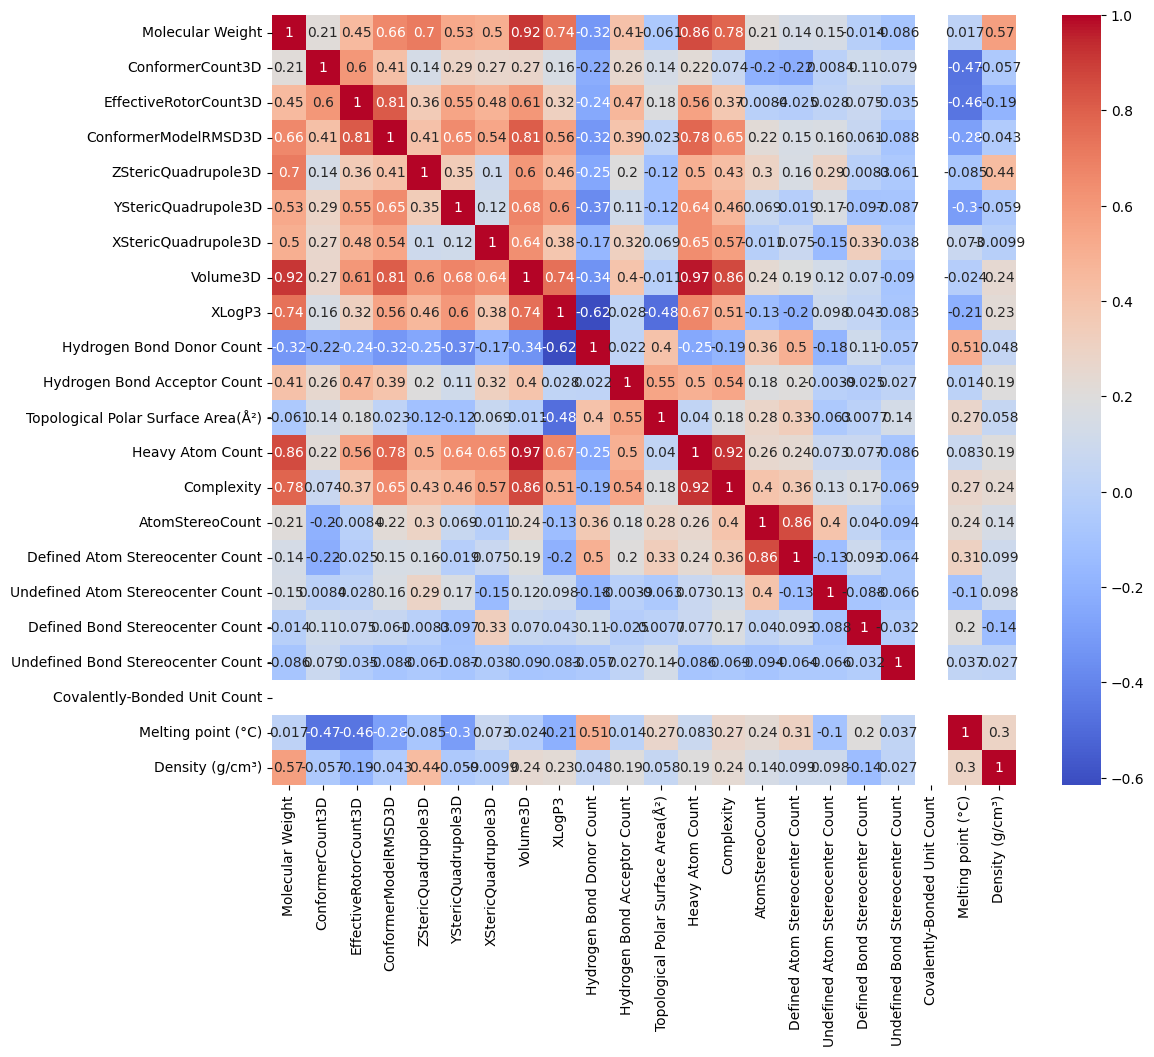

In [9]:
# Tworzenie macierzy korelacji
corr_matrix = data.corr()

# Tworzenie heatmapy z macierzy korelacji
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [10]:
#Znajdowanie par zmiennych z silną dodatnią korelacją
highly_corr_pairs = np.where(np.abs(corr_matrix) > 0.8)

# Tworzenie DataFrame zawierającego silnie skorelowane pary
highly_corr_pairs_df = pd.DataFrame(
    np.column_stack([corr_matrix.index[highly_corr_pairs[0]], 
                     corr_matrix.columns[highly_corr_pairs[1]], 
                     corr_matrix.values[highly_corr_pairs]]),
    columns=['Variable 1', 'Variable 2', 'Correlation'])

# Usuwanie par zmiennych, które są takie same (bo są idealnie skorelowane)
highly_corr_pairs_df = highly_corr_pairs_df.loc[highly_corr_pairs_df['Variable 1'] != highly_corr_pairs_df['Variable 2']]

# Wyświetlanie DataFrame z silnie skorelowanymi parami
print(highly_corr_pairs_df)

                         Variable 1                       Variable 2  \
1                  Molecular Weight                         Volume3D   
2                  Molecular Weight                 Heavy Atom Count   
5             EffectiveRotorCount3D             ConformerModelRMSD3D   
6              ConformerModelRMSD3D            EffectiveRotorCount3D   
8              ConformerModelRMSD3D                         Volume3D   
12                         Volume3D                 Molecular Weight   
13                         Volume3D             ConformerModelRMSD3D   
15                         Volume3D                 Heavy Atom Count   
16                         Volume3D                       Complexity   
21                 Heavy Atom Count                 Molecular Weight   
22                 Heavy Atom Count                         Volume3D   
24                 Heavy Atom Count                       Complexity   
25                       Complexity                         Volu

# Analiza PCA

In [22]:

# Wykonanie analizy PCA
pca = PCA()
principalComponents = pca.fit_transform(data_scaled)



# Wykres wyjaśnionej wariancji

Wariancja wyjaśniona przez główną składową 1: 28.21%
Wariancja wyjaśniona przez główną składową 2: 21.96%
Wariancja wyjaśniona przez główną składową 3: 10.0%
Wariancja wyjaśniona przez główną składową 4: 9.31%
Wariancja wyjaśniona przez główną składową 5: 8.49%
Wariancja wyjaśniona przez główną składową 6: 6.8%
Wariancja wyjaśniona przez główną składową 7: 6.08%
Wariancja wyjaśniona przez główną składową 8: 4.02%
Wariancja wyjaśniona przez główną składową 9: 2.19%
Wariancja wyjaśniona przez główną składową 10: 1.74%
Wariancja wyjaśniona przez główną składową 11: 0.82%
Wariancja wyjaśniona przez główną składową 12: 0.25%
Wariancja wyjaśniona przez główną składową 13: 0.14%
Wariancja wyjaśniona przez główną składową 14: 0.0%
Wariancja wyjaśniona przez główną składową 15: 0.0%


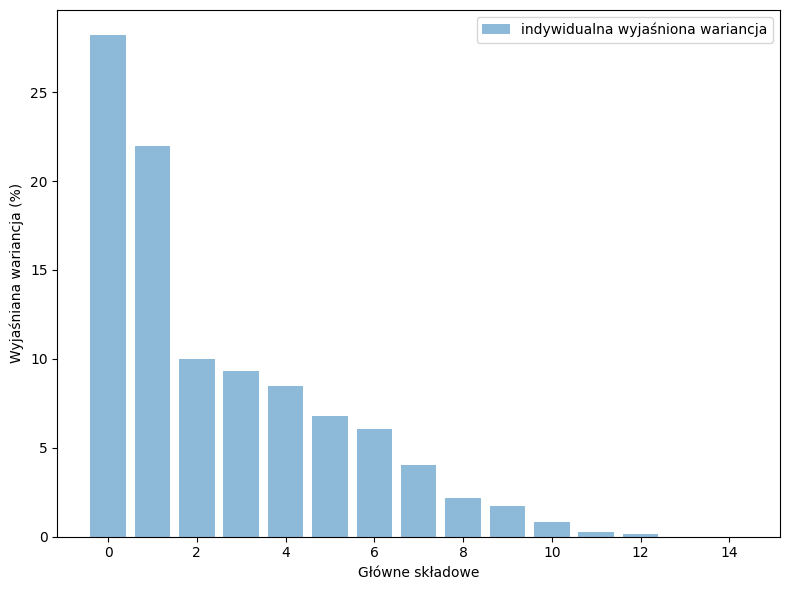

In [23]:
# Wyjaśniana wariancja przez każdy komponent
explained_variance = pca.explained_variance_ratio_

for i, exp_var in enumerate(explained_variance):
    print(f'Wariancja wyjaśniona przez główną składową {i+1}: {(exp_var*100).round(2)}%')

# Wykres wyjaśnionej wariancji
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance)), explained_variance*100, alpha=0.5, align='center', label='indywidualna wyjaśniona wariancja')
plt.ylabel('Wyjaśniana wariancja (%)')
plt.xlabel('Główne składowe')
plt.legend(loc='best')
plt.tight_layout()

# Wykres punktowy dla dwóch pierwszych komponentów głównych

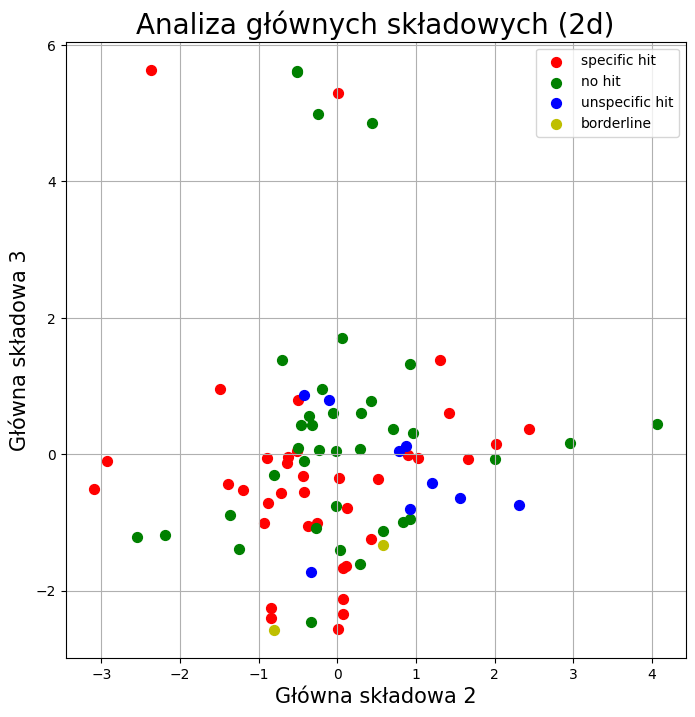

In [28]:
# Wykres dwóch pierwszych składowych głównych
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Główna składowa 2', fontsize = 15)
ax.set_ylabel('Główna składowa 3', fontsize = 15)
ax.set_title('Analiza głównych składowych (2d)', fontsize = 20)
#targets = ['Developmental toxicant', '?', 'Developmental NON-toxicant']
#colors = ['r','g','b']
#for target, color in zip(targets, colors):
#    indices_to_keep = df['Predicted Development Neurotoxicity'] == target
targets = ['specific hit', 'no hit', 'unspecific hit', 'borderline']
colors = ['r','g','b', 'y']
for target, color in zip(targets, colors):
    indices_to_keep = df['inne'] == target
    ax.scatter(principalComponents[indices_to_keep, 2], principalComponents[indices_to_keep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [24]:

pd.set_option('display.max_rows', None)

In [29]:
# utworzenie DataFrame dla głównych komponentów
pc_df = pd.DataFrame(data=principalComponents, 
                     columns=[f'Principal Component {i}' for i in range(1, len(numerical_columns) + 1)])

pc_3 = pc_df.loc[:, ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']]
pc_3 = pd.concat([pc_3, df[['compound_name']], df[['inne']]], axis = 1)
pc_3.head()

,Principal Component 1,Principal Component 2,Principal Component 3,compound_name,inne
0,-2.746261,-1.941071,0.227846,(-)-Nicotine,no hit
1,-4.134419,-0.946547,1.912871,1-Naphthol,specific hit
2,0.462577,-1.328040,3.419646,"2,2',4,4'-Tetrabromodiphenyl ether",specific hit
3,3.159107,-2.700161,-0.480129,2-Ethylhexyl diphenyl phosphate,specific hit
4,1.048598,0.587760,3.970211,"3,3',5,5'-Tetrabromobisphenol A",specific hit


In [30]:
pc_3

,Principal Component 1,Principal Component 2,Principal Component 3,compound_name,inne
0,-2.746261,-1.941071,0.227846,(-)-Nicotine,no hit
1,-4.134419,-0.946547,1.912871,1-Naphthol,specific hit
2,0.462577,-1.328040,3.419646,"2,2',4,4'-Tetrabromodiphenyl ether",specific hit
3,3.159107,-2.700161,-0.480129,2-Ethylhexyl diphenyl phosphate,specific hit
4,1.048598,0.587760,3.970211,"3,3',5,5'-Tetrabromobisphenol A",specific hit
5,-1.517570,0.943949,1.753420,"5,5-Diphenylhydantoin",no hit
6,-2.639798,-0.279907,-0.659823,Acephate,no hit
7,-4.210848,0.214715,0.802461,Acetaminophen,no hit
8,-1.740335,-1.214231,-0.301846,Acetamiprid,no hit
9,-2.108914,-0.432156,-0.548065,Acibenzolar-S-methyl,specific hit


# Analiza HCA

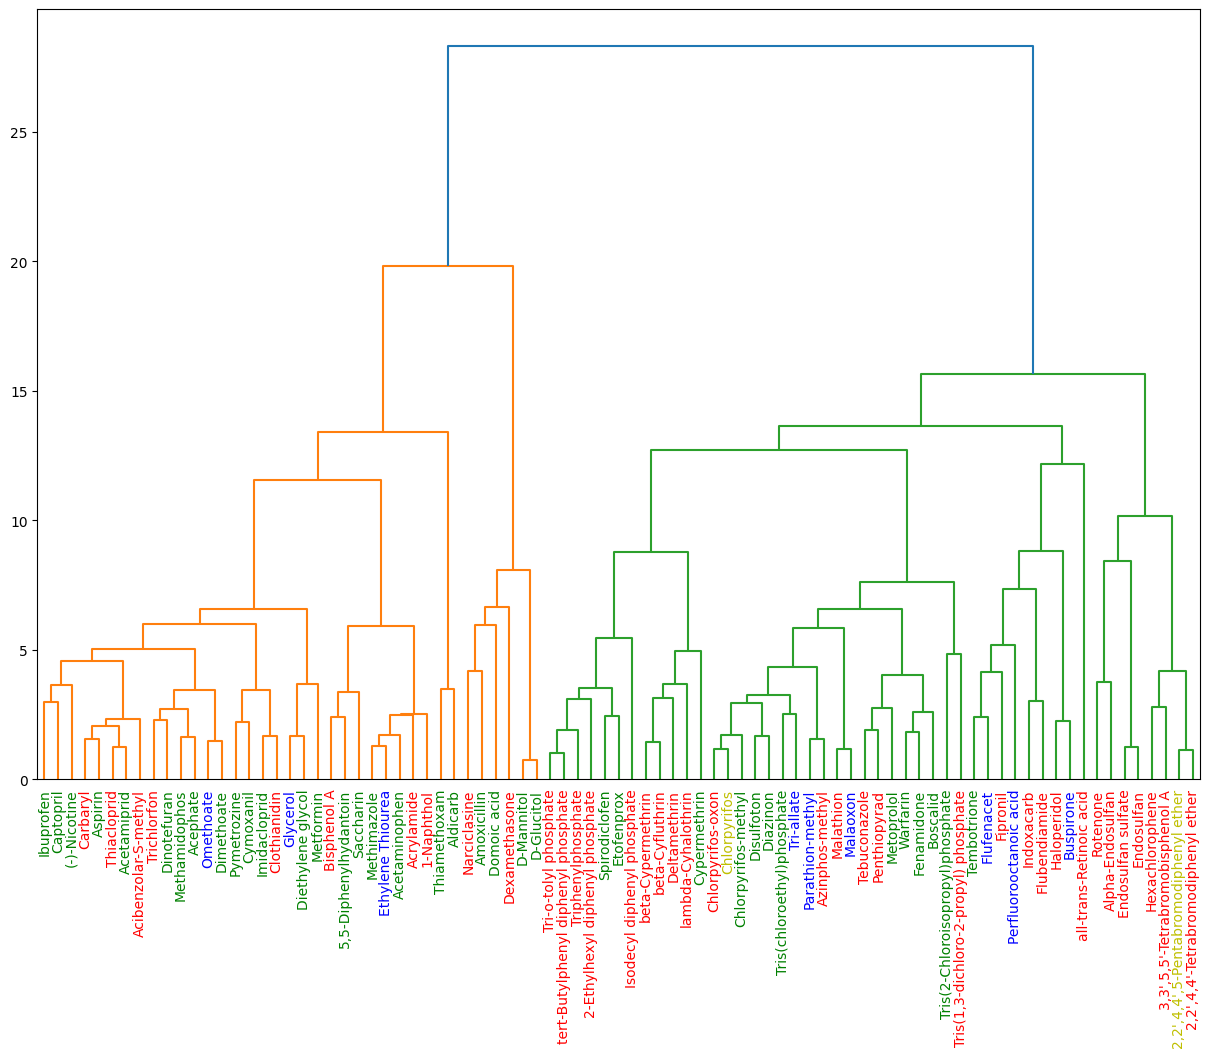

{'compound_name': 'Ibuprofen', 'predicted_toxicity': 'no hit', 'color': 'g'}
{'compound_name': 'Captopril', 'predicted_toxicity': 'no hit', 'color': 'g'}
{'compound_name': '(-)-Nicotine', 'predicted_toxicity': 'no hit', 'color': 'g'}
{'compound_name': 'Carbaryl', 'predicted_toxicity': 'specific hit', 'color': 'r'}
{'compound_name': 'Aspirin', 'predicted_toxicity': 'no hit', 'color': 'g'}
{'compound_name': 'Thiacloprid', 'predicted_toxicity': 'specific hit', 'color': 'r'}
{'compound_name': 'Acetamiprid', 'predicted_toxicity': 'no hit', 'color': 'g'}
{'compound_name': 'Acibenzolar-S-methyl', 'predicted_toxicity': 'specific hit', 'color': 'r'}
{'compound_name': 'Trichlorfon', 'predicted_toxicity': 'specific hit', 'color': 'r'}
{'compound_name': 'Dinotefuran', 'predicted_toxicity': 'no hit', 'color': 'g'}
{'compound_name': 'Methamidophos', 'predicted_toxicity': 'no hit', 'color': 'g'}
{'compound_name': 'Acephate', 'predicted_toxicity': 'no hit', 'color': 'g'}
{'compound_name': 'Omethoate',

In [41]:
# Wykonanie hierarchicznej analizy skupień
linked = linkage(data_scaled, 'ward')

# Definiowanie kolorów dla różnych grup
label_colors = {'specific hit': 'r', 'no hit': 'g', 'unspecific hit': 'b', 'borderline': 'y'}

# Rysowanie dendrogramu
plt.figure(figsize=(15, 10))
dendro = dendrogram(linked,  
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True,
           labels=df['compound_name'].values,
           leaf_font_size=10,
           no_labels=False)

# Kolorowanie etykiet
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()

label_info = []

for lbl in xlbls:
    compound_name = lbl.get_text()
    predicted_toxicity = df[df['compound_name'] == compound_name]['inne'].values[0]
    lbl.set_color(label_colors[predicted_toxicity])
    label_info.append({'compound_name': compound_name, 'predicted_toxicity': predicted_toxicity, 'color': label_colors[predicted_toxicity]})

cluster_info = []

# Zapisanie informacji o klastrach
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = 0.5 * sum(i[1:3])
    y = d[1]
    if y > 0:
        cluster_info.append({'x': x, 'y': y, 'color': c, 'distance': y})

# Zapisanie liczby obserwacji w klastrze dla każdego połączenia
for i, j in zip(dendro['icoord'], dendro['dcoord']):
    x = 0.5 * sum(i[1:3])
    y = j[1]
    if y > 10:
        cluster_info.append({'x': x, 'y': y, 'count': (i[1]-i[0]+1)})

#ax.legend(label_colors)
plt.show()

# Wydrukowanie informacji o etykietach
for info in label_info:
    print(info)

# Wydrukowanie informacji o klastrach
for info in cluster_info:
    print(info)


In [37]:
print(dendro, xlbls)

{'icoord': [[5.0, 5.0, 15.0, 15.0], [10.0, 10.0, 25.0, 25.0], [35.0, 35.0, 45.0, 45.0], [55.0, 55.0, 65.0, 65.0], [40.0, 40.0, 60.0, 60.0], [50.0, 50.0, 75.0, 75.0], [17.5, 17.5, 62.5, 62.5], [85.0, 85.0, 95.0, 95.0], [105.0, 105.0, 115.0, 115.0], [90.0, 90.0, 110.0, 110.0], [125.0, 125.0, 135.0, 135.0], [100.0, 100.0, 130.0, 130.0], [40.0, 40.0, 115.0, 115.0], [145.0, 145.0, 155.0, 155.0], [165.0, 165.0, 175.0, 175.0], [150.0, 150.0, 170.0, 170.0], [77.5, 77.5, 160.0, 160.0], [185.0, 185.0, 195.0, 195.0], [190.0, 190.0, 205.0, 205.0], [118.75, 118.75, 197.5, 197.5], [215.0, 215.0, 225.0, 225.0], [220.0, 220.0, 235.0, 235.0], [245.0, 245.0, 255.0, 255.0], [250.0, 250.0, 265.0, 265.0], [257.5, 257.5, 275.0, 275.0], [266.25, 266.25, 285.0, 285.0], [227.5, 227.5, 275.625, 275.625], [158.125, 158.125, 251.5625, 251.5625], [295.0, 295.0, 305.0, 305.0], [204.84375, 204.84375, 300.0, 300.0], [315.0, 315.0, 325.0, 325.0], [320.0, 320.0, 335.0, 335.0], [327.5, 327.5, 345.0, 345.0], [355.0, 355.